In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,state,same_state,age,python_yn,sql_yn,spark,power_bi,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,1,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    if 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
#Job title and seniority

df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [8]:
#fix Los Angeles state

df.state = df.state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
KY      6
GA      6
MI      6
DE      6
CT      5
IA      5
LA      4
NE      4
OR      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: state, dtype: int64

In [9]:
#Job description length

df['des_len'] = df['Job Description'].apply(lambda x: len(x))
df.des_len

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: des_len, Length: 742, dtype: int64

In [10]:
# Competitor count

df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [11]:
# Hourly wage to Annual age

df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis=1)

In [12]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
# remove new line from job title

df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r\n',''))

In [14]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [15]:
# Data analysis

df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,sql_yn,spark,power_bi,excel,des_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.512129,0.225067,0.045822,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.500190,0.417908,0.209240,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel', 'job_simp', 'seniority', 'des_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

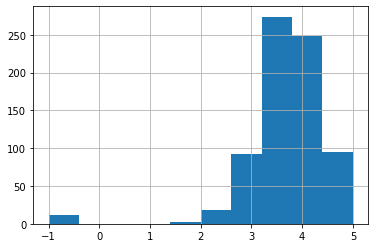

In [17]:
df.Rating.hist()

<AxesSubplot:>

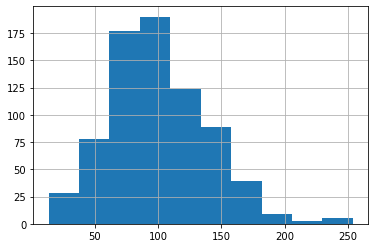

In [18]:
df.avg_salary.hist()

<AxesSubplot:>

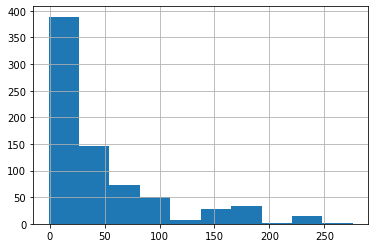

In [19]:
df.age.hist()

<AxesSubplot:>

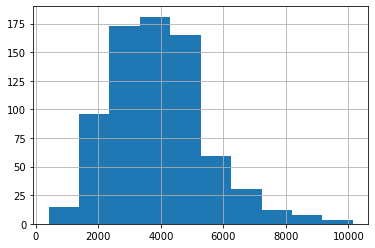

In [20]:
df.des_len.hist()

<AxesSubplot:>

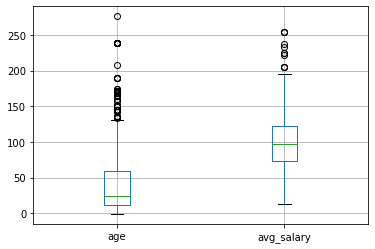

In [21]:
df.boxplot(column=['age','avg_salary'])

<AxesSubplot:>

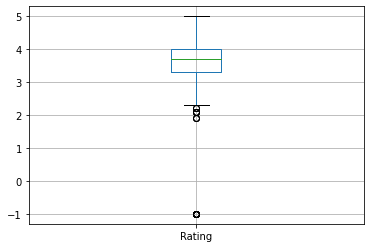

In [22]:
df.boxplot(column='Rating')

In [23]:
df[['age','avg_salary','Rating','des_len']].corr()

,age,avg_salary,Rating,des_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
des_len,0.165090,0.078093,-0.012631,1.000000


<AxesSubplot:>

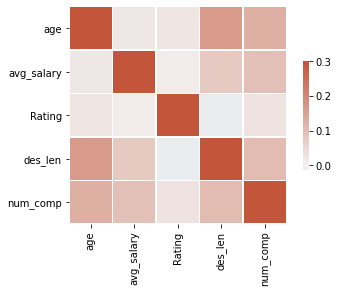

In [24]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df[['age','avg_salary','Rating','des_len','num_comp']].corr(),cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel', 'job_simp', 'seniority', 'des_len',
       'num_comp'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'state', 'same_state','python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel', 'job_simp', 'seniority']]

Graph for Location: Total = 200 


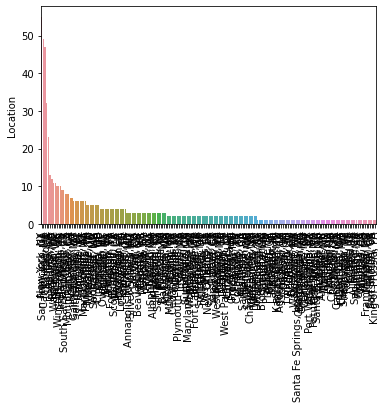

Graph for Headquarters: Total = 198 


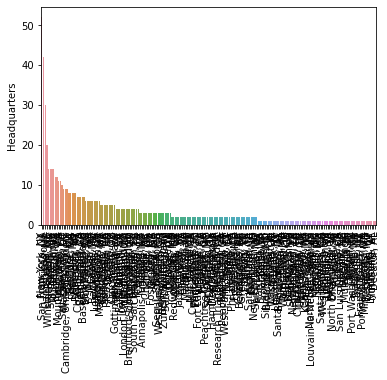

Graph for Size: Total = 9 


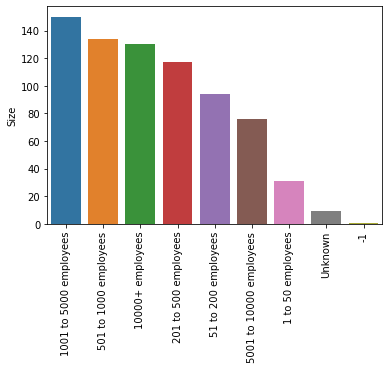

Graph for Type of ownership: Total = 11 


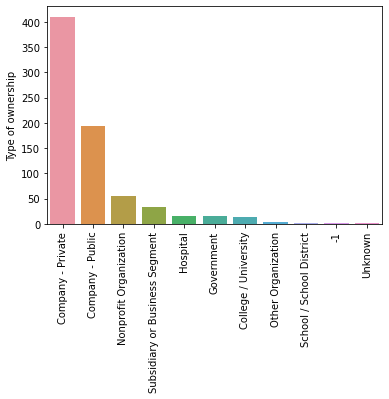

Graph for Industry: Total = 60 


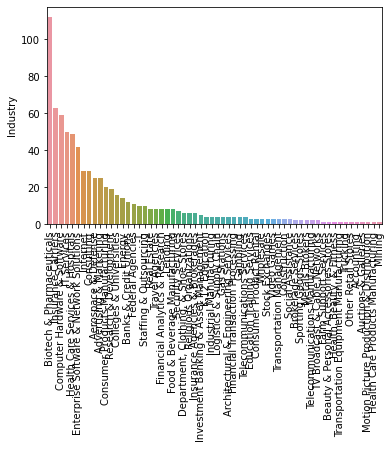

Graph for Sector: Total = 25 


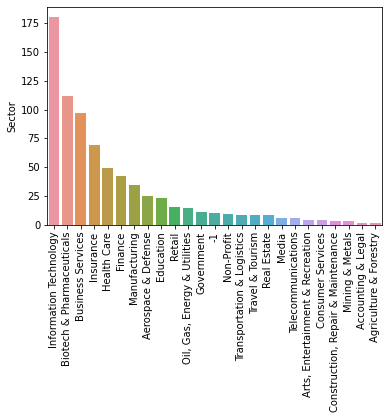

Graph for Revenue: Total = 14 


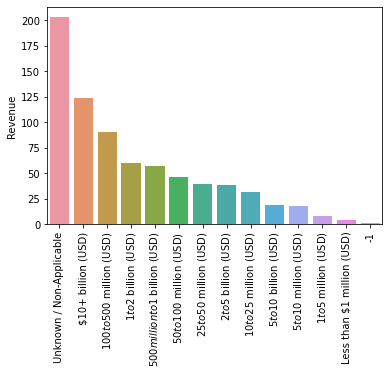

Graph for company_txt: Total = 343 


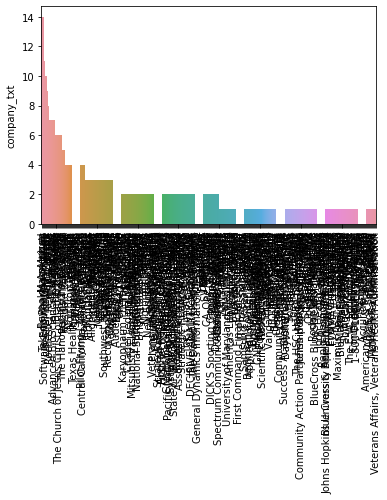

Graph for state: Total = 37 


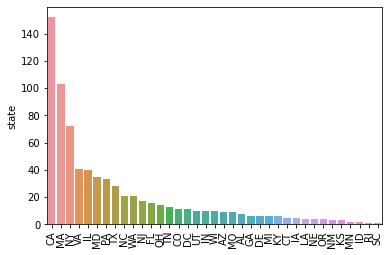

Graph for same_state: Total = 2 


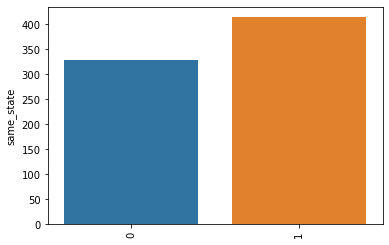

Graph for python_yn: Total = 2 


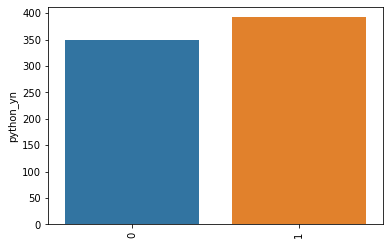

Graph for sql_yn: Total = 2 


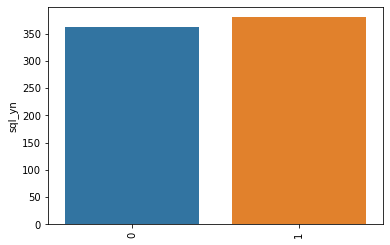

Graph for spark: Total = 2 


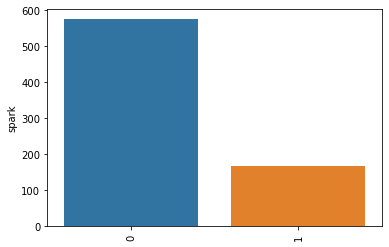

Graph for power_bi: Total = 2 


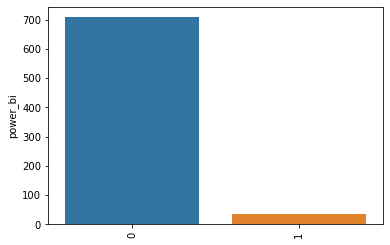

Graph for excel: Total = 2 


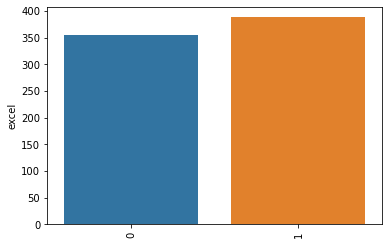

Graph for job_simp: Total = 7 


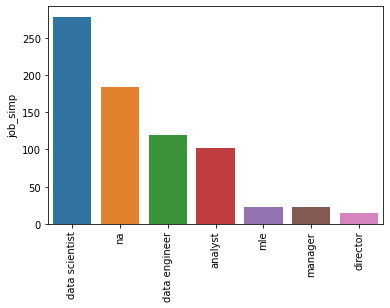

Graph for seniority: Total = 3 


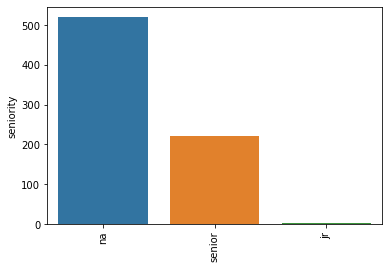

In [42]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d " % (i,len(cat_num)))
    charts = sns.barplot(x=cat_num.index, y=cat_num)
    charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20 


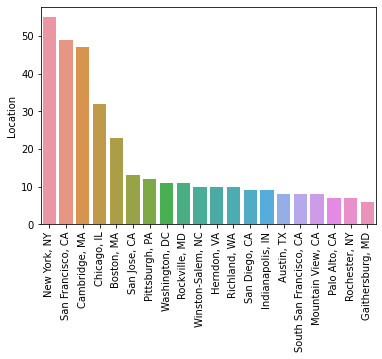

Graph for Headquarters: Total = 20 


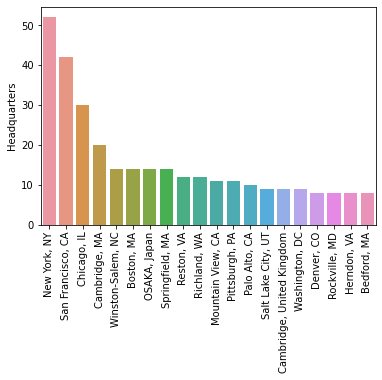

Graph for company_txt: Total = 20 


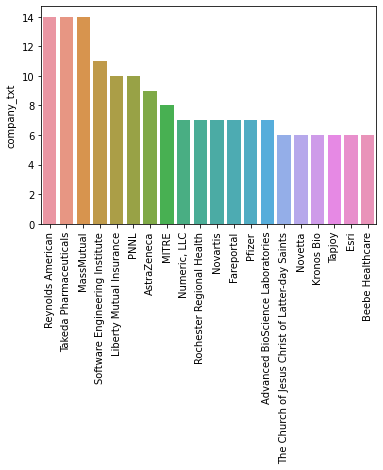

Graph for Industry: Total = 20 


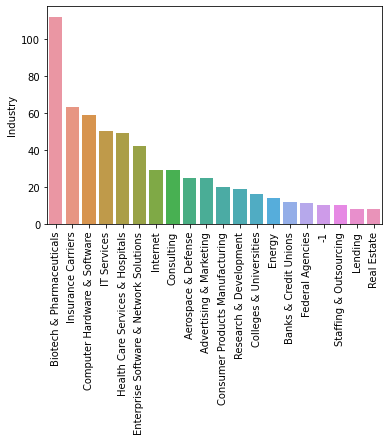

In [27]:
for i in df_cat[['Location', 'Headquarters','company_txt','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d " % (i,len(cat_num)))
    charts = sns.barplot(x=cat_num.index, y=cat_num)
    charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
    plt.show()

In [46]:
pd.pivot_table(df, index=['job_simp','seniority'], values= 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel', 'job_simp', 'seniority', 'des_len',
       'num_comp'],
      dtype='object')

In [30]:
df_pivots = df[['Rating','Industry', 'Sector','Type of ownership','python_yn', 'sql_yn',
       'spark', 'power_bi', 'excel','num_comp','hourly','employer_provided','avg_salary']]

In [34]:
for i in df_pivots.columns:
    print('\n', i, 'vs Salary', '\n')
    print(pd.pivot_table(df_pivots, index= i, values= 'avg_salary').sort_values('avg_salary', ascending=False))


 Rating vs Salary 

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

 Industry vs Salary 

                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommuni

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

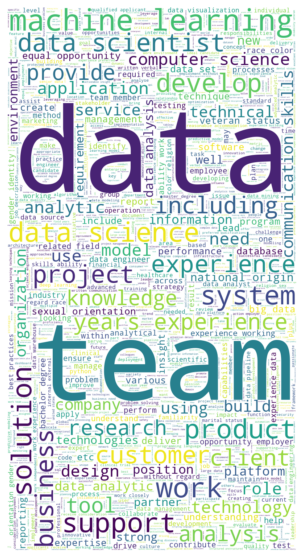

In [44]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()